In [88]:
import pandas as pd

In [89]:
df = pd.read_csv('final_merge.csv')
df_cleaned = df.dropna()
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,User-City,User-State,User-Country,User-Age
0,16877,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,houston,arkansas,"usa""",37
1,16877,034539657X,7,Dark Rivers of the Heart,Dean R. Koontz,1995,Ballantine Books,houston,arkansas,"usa""",37
2,16877,0743211383,3,Dreamcatcher,Stephen King,2001,Scribner,houston,arkansas,"usa""",37
3,16877,0786868716,10,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,houston,arkansas,"usa""",37
4,16877,0449242773,10,Walk Across America,Jenkins,1982,Not Avail,houston,arkansas,"usa""",37
...,...,...,...,...,...,...,...,...,...,...,...
139733,247140,0345340396,9,Red Planet,ROBERT A. HEINLEIN,1986,Del Rey,glendora,california,"usa""",32
139734,250253,1567181651,8,Dancing With Dragons: Invoke Their Ageless Wis...,D. J. Conway,1994,Llewellyn Publications,saugus,massachusetts,"usa""",28
139735,224913,0552996424,7,Swimming Pool Sunday,Madeleine Wickham,1997,Corgi Books,leamington spa,england,"united kingdom""",26
139736,259800,3250600571,9,Oskar und die Dame in Rosa,Eric-Emmanuel Schmitt,2003,Ammann,bremen,bremen,"germany""",25


In [90]:
# Group by 'Author' and count ratings, assuming 'rating' or a similar column exists for counting
author_ratings = df_cleaned.groupby('Book-Author')['Book-Rating'].count()

top_author = author_ratings.idxmax()
top_author_ratings = author_ratings.max()

top_author_data = df_cleaned[df_cleaned['Book-Author'] == top_author]
books_ratings = top_author_data.groupby('Book-Title')['Book-Rating'].count()
print(f"Top Author: {top_author}")
print(f"Total Ratings Received by {top_author}: {top_author_ratings}")
print("Books and Ratings Counts:")
print(books_ratings)
print(len(books_ratings))

Top Author: Stephen King
Total Ratings Received by Stephen King: 3139
Books and Ratings Counts:
Book-Title
'Salem's Lot                                    18
Apocalipsis                                      3
BAG OF BONES : A NOVEL                          33
Bag of Bones                                    63
Black House                                     63
                                                ..
Thinner                                         54
Tommyknockers                                    2
Waste Lands Tower 3 (The Dark Tower III)         6
Wizard and Glass (The Dark Tower, Book 4)       49
Wolves of the Calla (The Dark Tower, Book 5)    20
Name: Book-Rating, Length: 108, dtype: int64
108


In [91]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np


In [92]:
stephen_king_data = df_cleaned[df_cleaned['Book-Author'] == 'Stephen King']

# Encode 'Country' as an integer because KMeans doesn't handle categorical variables directly
encoder = LabelEncoder()
stephen_king_data['User-Country-Encode'] = encoder.fit_transform(stephen_king_data['User-Country'])


# Features for KMeans will include Country_Code and Book-Rating
X = stephen_king_data[['User-Country-Encode', 'Book-Rating']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=32, random_state=3000)  # Adjust the number of clusters as necessary
clusters = kmeans.fit_predict(X_scaled)

# Add cluster information back to the DataFrame
stephen_king_data['Cluster'] = clusters

stephen_king_data

/var/folders/2y/d2x11n9s4sbc3j2svdb5qdb00000gn/T/ipykernel_4476/4231006000.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stephen_king_data['User-Country-Encode'] = encoder.fit_transform(stephen_king_data['User-Country'])
/var/folders/2y/d2x11n9s4sbc3j2svdb5qdb00000gn/T/ipykernel_4476/4231006000.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stephen_king_data['Cluster'] = clusters


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,User-City,User-State,User-Country,User-Age,User-Country-Encode,Cluster
2,16877,0743211383,3,Dreamcatcher,Stephen King,2001,Scribner,houston,arkansas,"usa""",37,32,26
111,31315,0684867621,9,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,henryville,indiana,"usa""",34,32,16
134,31315,0451124340,9,Different Seasons,Stephen King,1983,Penguin Putnam~mass,henryville,indiana,"usa""",34,32,16
215,31315,0670844527,6,Dolores Claiborne,Stephen King,1992,Viking Books,henryville,indiana,"usa""",34,32,11
234,31315,0451193881,10,The Shining,Stephen King,1997,Signet Book,henryville,indiana,"usa""",34,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138898,158653,0452257743,7,The Bachman Books: Four Early Novels by Stephe...,Stephen King,1985,Penguin USA,belmar,new jersey,"usa""",34,32,0
138947,77120,0451933028,8,The Green Mile: The Complete Six Part Novel,Stephen King,1996,Signet Book,narara,new south wales,"australia""",24,0,1
138948,266667,0451933028,10,The Green Mile: The Complete Six Part Novel,Stephen King,1996,Signet Book,west des moines,iowa,"usa""",28,32,2
139350,264661,0451139682,10,Different Seasons,Stephen King,1983,Signet Book,howell,new jersey,"usa""",14,32,2


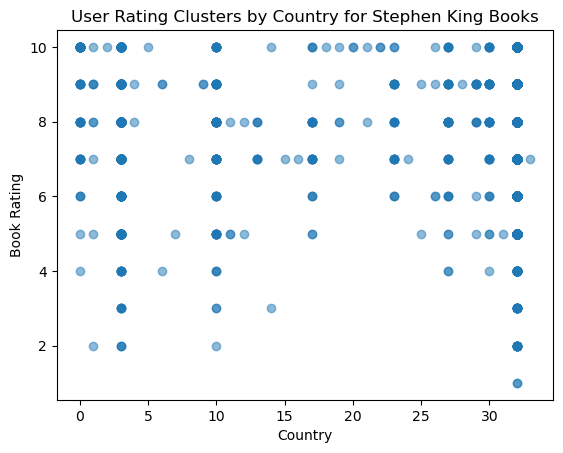

In [93]:
# Plotting
plt.scatter(x=stephen_king_data['User-Country-Encode'], y=stephen_king_data['Book-Rating'], alpha=0.5)

plt.title('User Rating Clusters by Country for Stephen King Books')
plt.xlabel('Country')
plt.ylabel('Book Rating')
plt.show()